# NLP 機器學習:自然語言處理實務
# (讓電腦擁有理解人類語言的能力，就是自然語言處理 (Natural Language Processing，縮寫 NLP)。
## 授課教師: 黃志泰
## 實作教材手冊初編撰日期:2019.2.01
## 實作內容:實作與訓練學習 Python+NLP+ChatGpt
## 實作訓練時數:15~18小時
## 備註:
<hr>

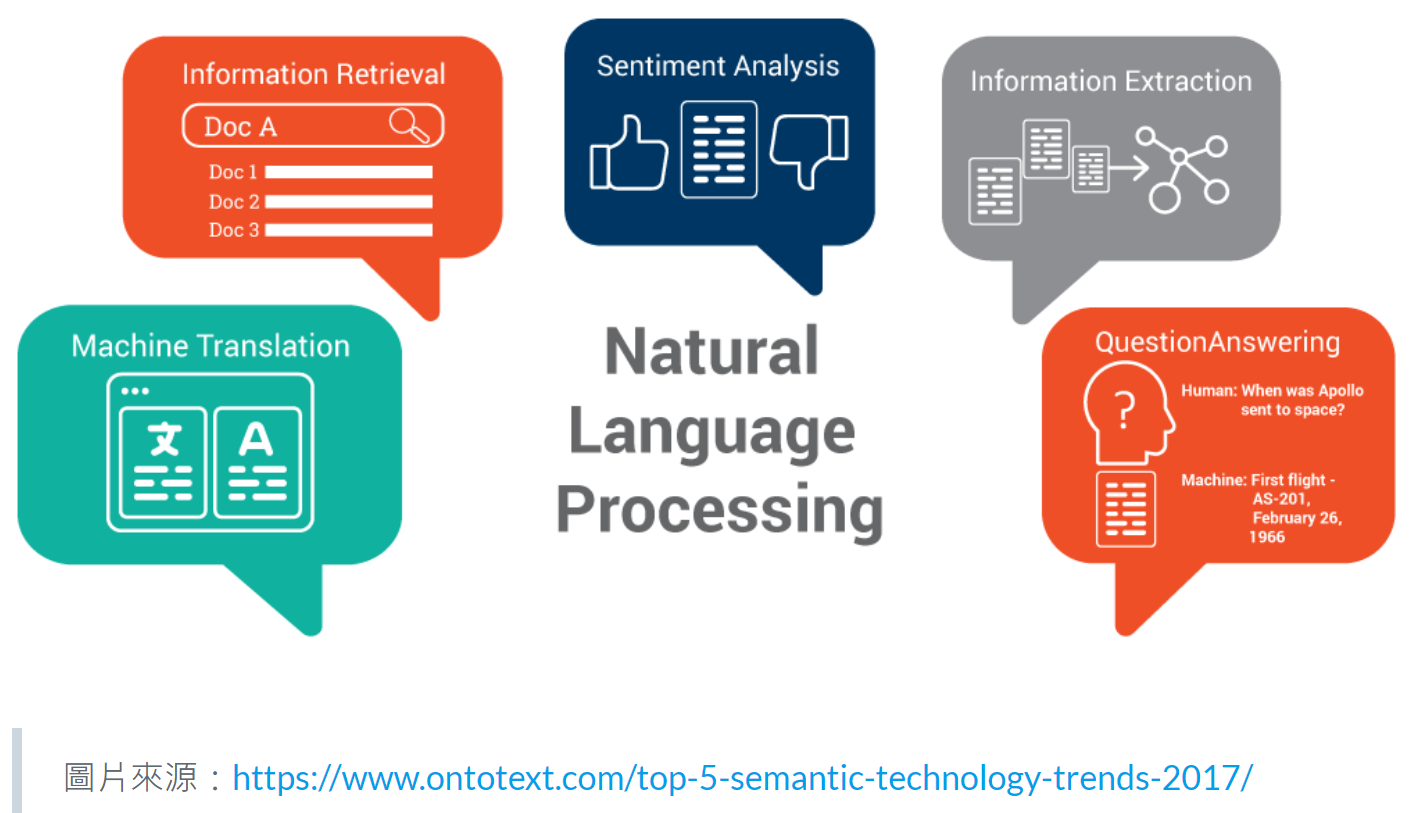

# NLP:第一步是斷詞、理解詞；第二步則是分析句子，包含語法及語義的自動解析。
## >斷詞
將句子分成最小的語義單位，是信息檢索、文本分類、情感分析等後續自然語言處理任務的基礎。英文的斷詞可用空格切，而中文斷詞是困難的。
## >詞性標注（POS，Part-Of-Speech）
標上詞性類別，像是名詞、動詞、形容詞。以語法特徵為主要依據，為兼顧詞彙意義的對詞進行劃分。分析句子 ==>語法,理解詞



## ==>我来到北京清华大学,他来到了网易杭研大厦,小明硕士毕业于中国科学院计算所，后在日本京都大学深造.
# jieba  Python 中文分词组件
# https://github.com/fxsjy/jieba

# 特点
支持三种分词模式：

<li>精确模式，试图将句子最精确地切开，适合文本分析；
<li>全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
<li>搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
<br>支持繁体分词,支持自定义词典,MIT 授权协议

# 安装使用说明
## ==>pip install jieba
### Python 通过 import jieba 来引用

# 主要功能
## 1.分词
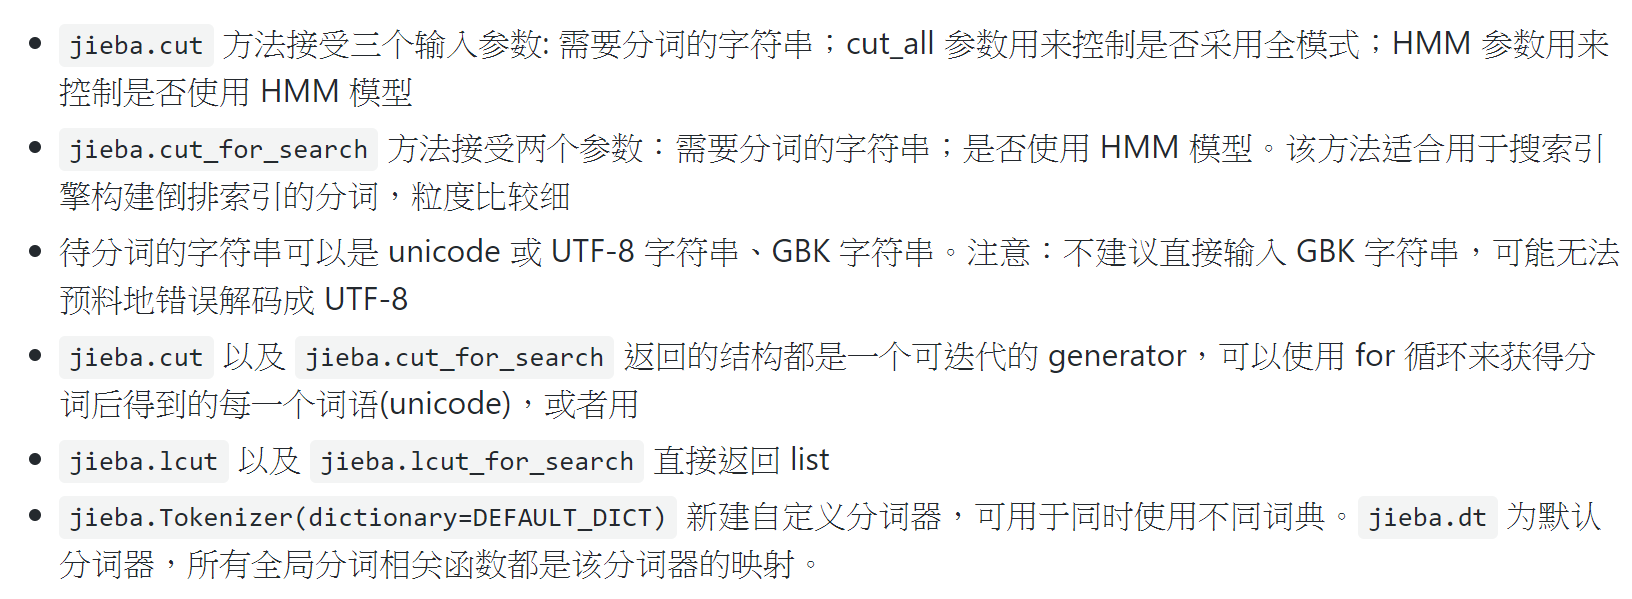

In [1]:
# encoding=utf-8
import jieba

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("雲林縣長張麗善在去年底選前之夜提出「免收老舊自用住宅房屋稅」政見，隔天順利當選，她今天兌現承諾，宣布提高房屋稅折舊率及提高住家房屋免徵現值等，雲林縣民明年繳稅時可減免房屋稅，預估將有1萬2千戶受惠。", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hgtma\AppData\Local\Temp\jieba.cache
Loading model cost 0.533 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 雲林/ 縣長/ 張麗善/ 在/ 去年底/ 選前/ 之夜/ 提出/ 「/ 免收/ 老舊/ 自用/ 住宅/ 房屋/ 稅/ 」/ 政見/ ，/ 隔天/ 順利/ 當選/ ，/ 她/ 今天/ 兌現/ 承諾/ ，/ 宣布/ 提高/ 房屋/ 稅折/ 舊率/ 及/ 提高/ 住家/ 房屋/ 免徵現/ 值/ 等/ ，/ 雲林/ 縣民/ 明年/ 繳稅/ 時/ 可/ 減免/ 房屋/ 稅/ ，/ 預估/ 將有/ 1/ 萬/ 2/ 千戶/ 受惠/ 。
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


In [2]:
# encoding=utf-8
import jieba



seg_list = jieba.cut("雲林縣長張麗善在去年底選前之夜提出「免收老舊自用住宅房屋稅」政見，隔天順利當選，她今天兌現承諾，宣布提高房屋稅折舊率及提高住家房屋免徵現值等，雲林縣民明年繳稅時可減免房屋稅，預估將有1萬2千戶受惠。", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式



Default Mode: 雲林/ 縣長/ 張麗善/ 在/ 去年底/ 選前/ 之夜/ 提出/ 「/ 免收/ 老舊/ 自用/ 住宅/ 房屋/ 稅/ 」/ 政見/ ，/ 隔天/ 順利/ 當選/ ，/ 她/ 今天/ 兌現/ 承諾/ ，/ 宣布/ 提高/ 房屋/ 稅折/ 舊率/ 及/ 提高/ 住家/ 房屋/ 免徵現/ 值/ 等/ ，/ 雲林/ 縣民/ 明年/ 繳稅/ 時/ 可/ 減免/ 房屋/ 稅/ ，/ 預估/ 將有/ 1/ 萬/ 2/ 千戶/ 受惠/ 。


# 2.添加自定义词典
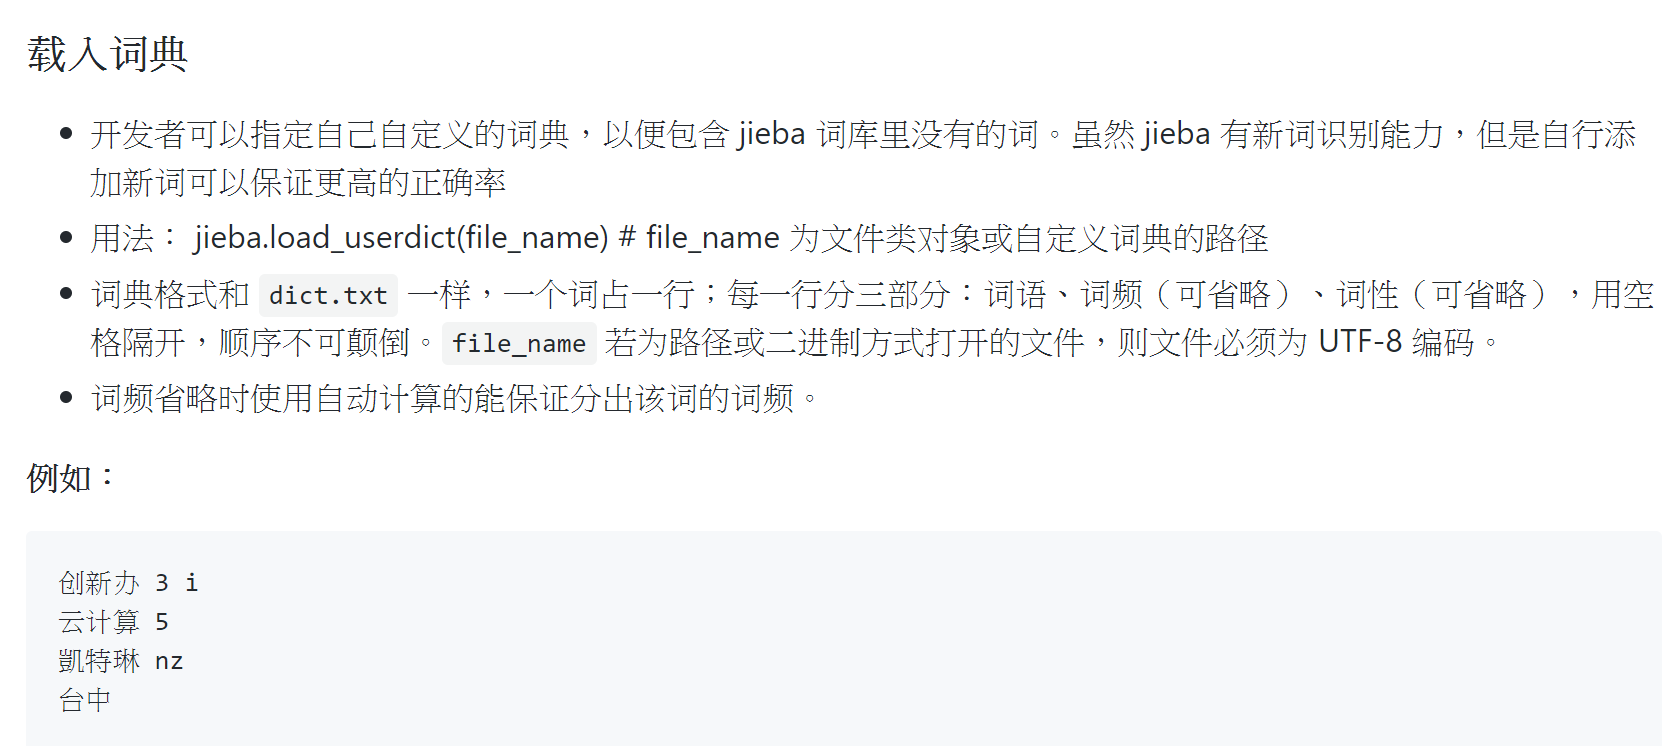


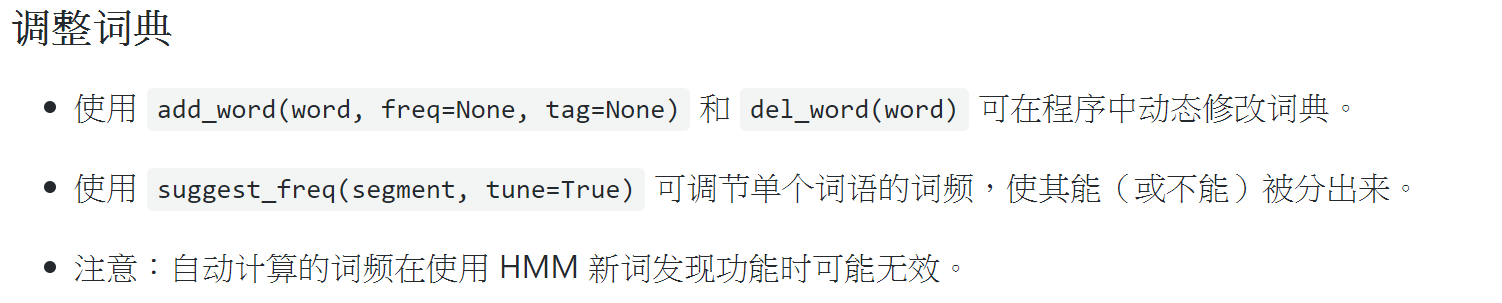

In [3]:
#encoding=utf-8
from __future__ import print_function, unicode_literals
import sys
sys.path.append("../")
import jieba
jieba.load_userdict("userdict.txt")
import jieba.posseg as pseg

jieba.add_word('石墨烯')
jieba.add_word('凱特琳')
jieba.del_word('自定义词')

test_sent = (
"李小福是创新办主任也是云计算方面的专家; 什么是八一双鹿\n"
"例如我输入一个带“韩玉赏鉴”的标题，在自定义词库中也增加了此词为N类\n"
"「台中」正確應該不會被切開。mac上可分出「石墨烯」；此時又可以分出來凱特琳了。"
)
words = jieba.cut(test_sent)
print('/'.join(words))

print("="*40)

result = pseg.cut(test_sent)

for w in result:
    print(w.word, "/", w.flag, ", ", end=' ')

print("\n" + "="*40)

terms = jieba.cut('easy_install is great')
print('/'.join(terms))
terms = jieba.cut('python 的正则表达式是好用的')
print('/'.join(terms))

print("="*40)
# test frequency tune
testlist = [
('今天天气不错', ('今天', '天气')),
('如果放到post中将出错。', ('中', '将')),
('我们中出了一个叛徒', ('中', '出')),
]

for sent, seg in testlist:
    print('/'.join(jieba.cut(sent, HMM=False)))
    word = ''.join(seg)
    print('%s Before: %s, After: %s' % (word, jieba.get_FREQ(word), jieba.suggest_freq(seg, True)))
    print('/'.join(jieba.cut(sent, HMM=False)))
    print("-"*40)

李小福/是/创新办/主任/也/是/云计算/方面/的/专家/;/ /什么/是/八一双鹿/
/例如/我/输入/一个/带/“/韩玉赏鉴/”/的/标题/，/在/自定义/词库/中/也/增加/了/此/词为/N/类/
/「/台中/」/正確/應該/不會/被/切開/。/mac/上/可/分出/「/石墨烯/」/；/此時/又/可以/分出/來/凱特琳/了/。
李小福 / nr ,  是 / v ,  创新办 / i ,  主任 / b ,  也 / d ,  是 / v ,  云计算 / x ,  方面 / n ,  的 / uj ,  专家 / n ,  ; / x ,    / x ,  什么 / r ,  是 / v ,  八一双鹿 / nz ,  
 / x ,  例如 / v ,  我 / r ,  输入 / v ,  一个 / m ,  带 / v ,  “ / x ,  韩玉赏鉴 / nz ,  ” / x ,  的 / uj ,  标题 / n ,  ， / x ,  在 / p ,  自定义 / l ,  词库 / n ,  中 / f ,  也 / d ,  增加 / v ,  了 / ul ,  此 / r ,  词 / n ,  为 / p ,  N / eng ,  类 / q ,  
 / x ,  「 / x ,  台中 / s ,  」 / x ,  正確 / ad ,  應該 / v ,  不 / d ,  會 / v ,  被 / p ,  切開 / ad ,  。 / x ,  mac / eng ,  上 / f ,  可 / v ,  分出 / v ,  「 / x ,  石墨烯 / x ,  」 / x ,  ； / x ,  此時 / c ,  又 / d ,  可以 / c ,  分出 / v ,  來 / zg ,  凱特琳 / nz ,  了 / ul ,  。 / x ,  
easy_install/ /is/ /great
python/ /的/正则表达式/是/好用/的
今天天气/不错
今天天气 Before: 3, After: 0
今天/天气/不错
----------------------------------------
如果/放到/post/中将/出错/。
中将 Before: 763, After: 494
如果/放到

In [4]:
print('/'.join(jieba.cut('如果是post陳中将出错。', HMM=False)))

如果/是/post/陳/中/将/出错/。


In [5]:
 jieba.suggest_freq(('中将'), True)

495

In [6]:
print('/'.join(jieba.cut('如果是post陳中将出错。', HMM=False)))

如果/是/post/陳/中将/出错/。


In [7]:
print('/'.join(jieba.cut('「台中」正确应该不会被切开', HMM=False)))

「/台中/」/正确/应该/不会/被/切开


In [8]:
jieba.suggest_freq('台中', True)

70

In [9]:
 print('/'.join(jieba.cut('「台中」正确应该不会被切开', HMM=False)))

「/台中/」/正确/应该/不会/被/切开


# 3.关键词提取(NLP應用一)
## A.基于 TF-IDF 算法的关键词抽取

# TF-IDF(term frequency–inverse document frequency)是一种用于信息检索与数据挖掘的常用加权技术，常用于挖掘文章中的关键词，而且算法简单高效，常被工业界用于最开始的文本数据清洗。

TF-IDF有两层意思，一层是**“词频”（Term Frequency，缩写为TF），另一层是"逆文档频率"**（Inverse Document Frequency，缩写为IDF）


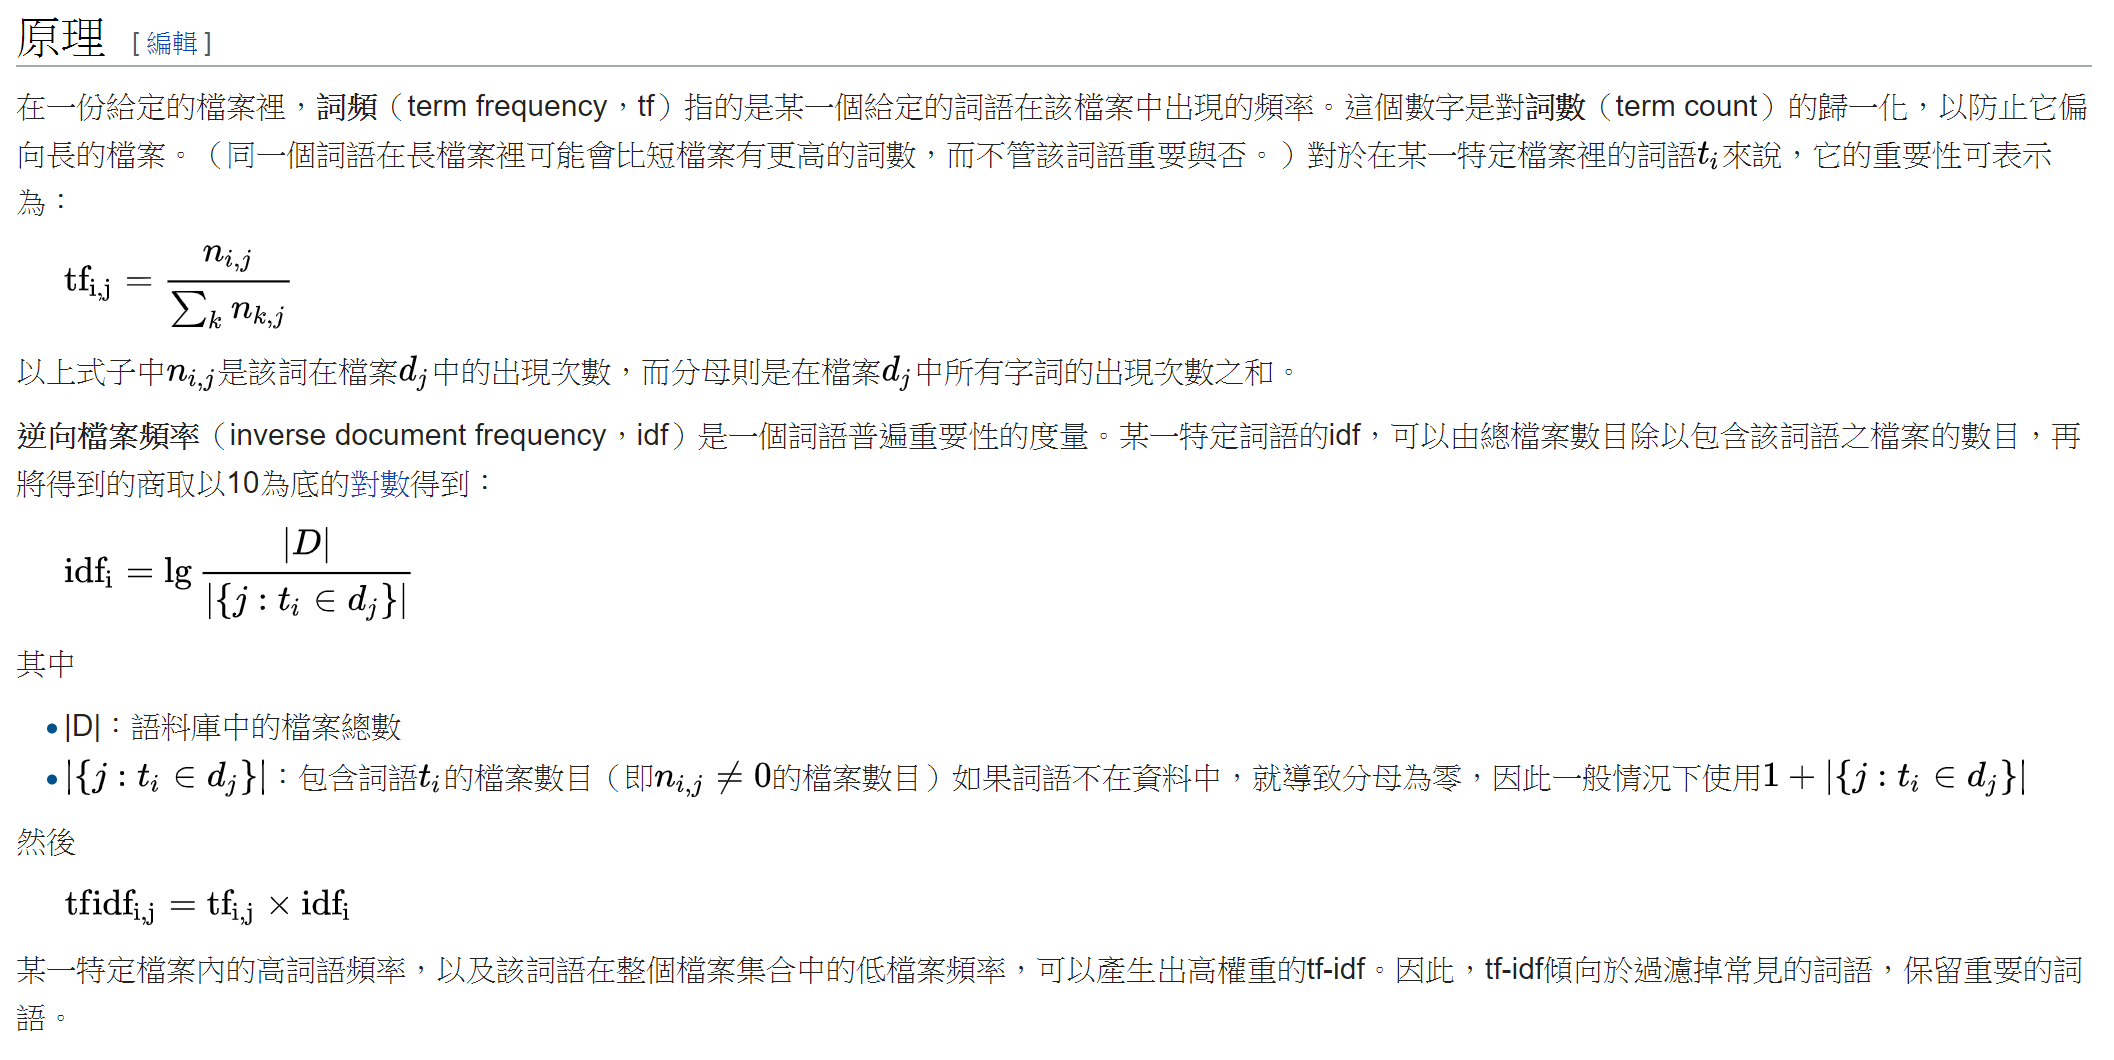

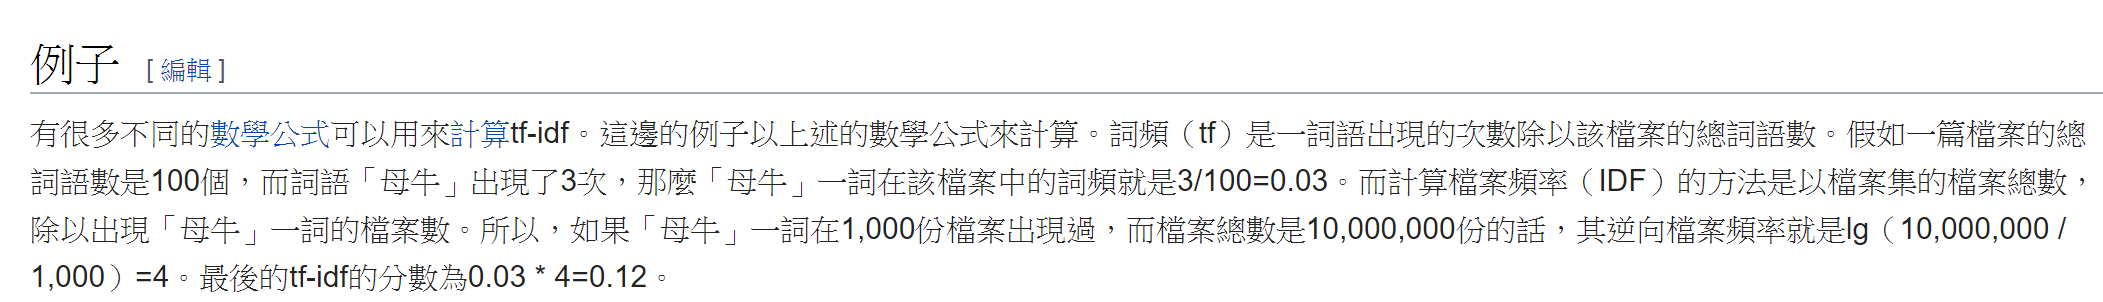

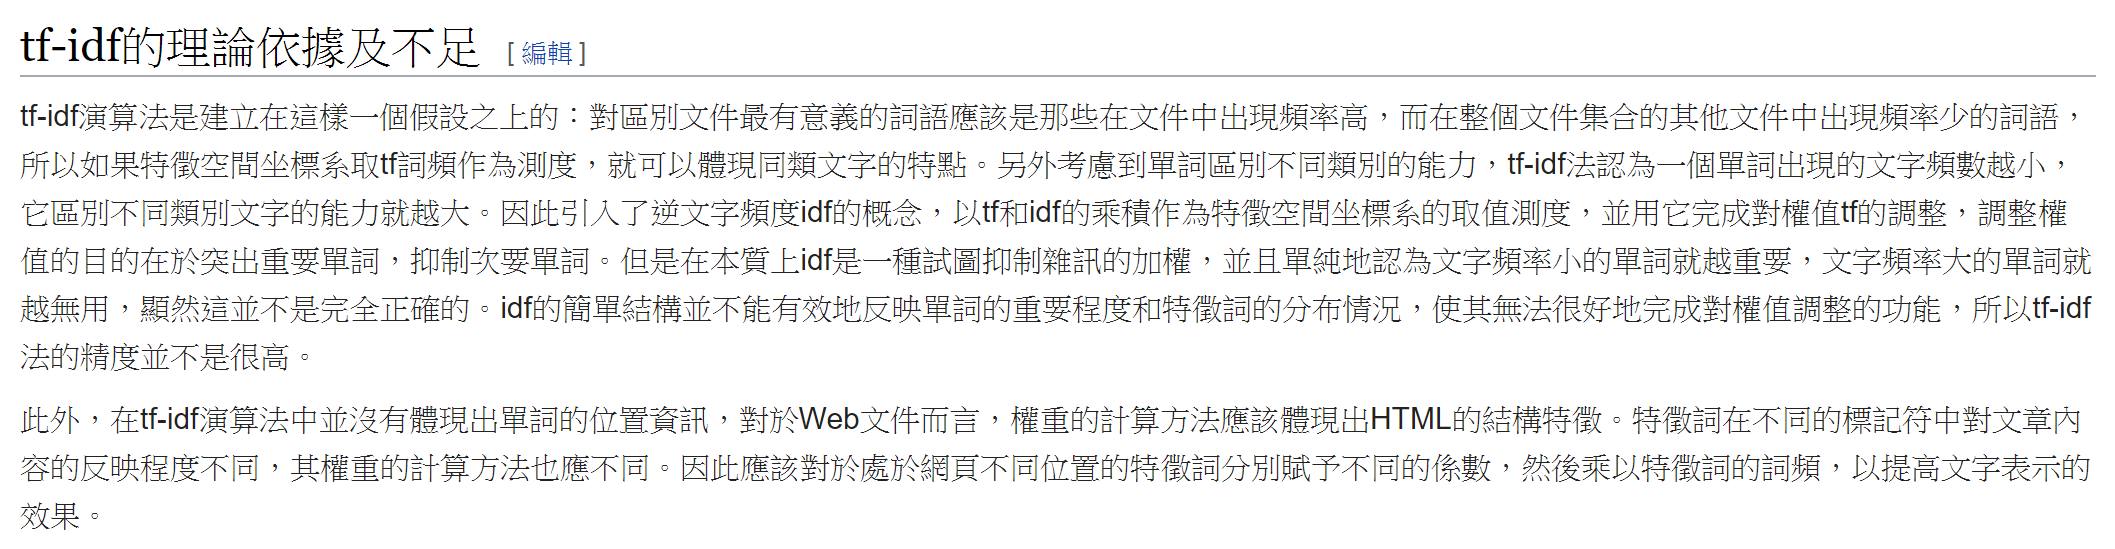

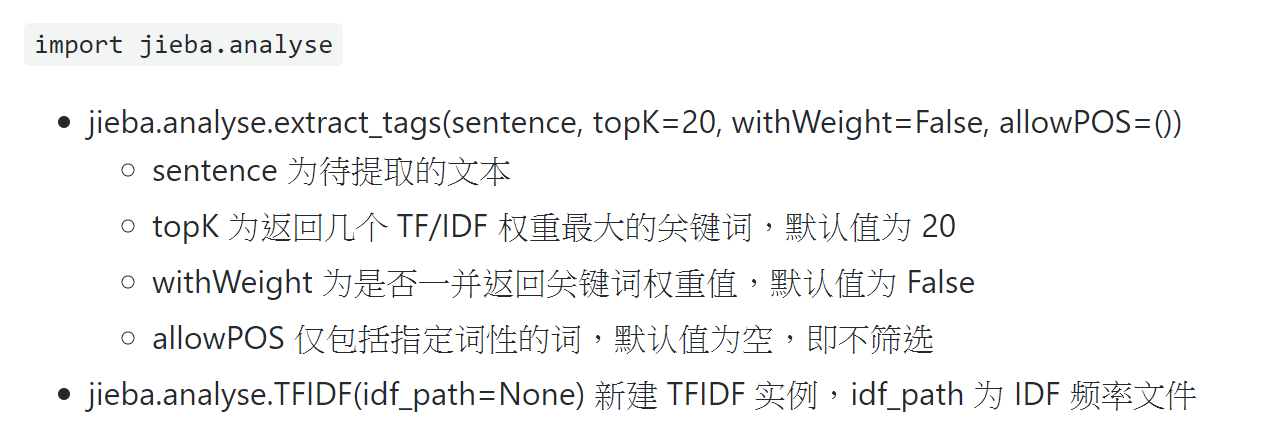

In [11]:
import sys
sys.path.append('../')

import jieba
import jieba.analyse


file_name = "news.txt"
topKnum = 12
withWeights = True

content = open(file_name, 'rb').read()

tags = jieba.analyse.extract_tags(content, topK=topKnum)

print(",".join(tags))
tagsw = jieba.analyse.extract_tags(content, topK=topKnum, withWeight=withWeights)
for tag in tagsw:
        print("tag: %s\t\t weight: %f" % (tag[0],tag[1]))

文化,刘云山,工作者,看望,陈先达,习近平,著名,加强,玛拉沁夫,总书记,简书,文艺
tag: 文化		 weight: 0.257158
tag: 刘云山		 weight: 0.228826
tag: 工作者		 weight: 0.127848
tag: 看望		 weight: 0.105343
tag: 陈先达		 weight: 0.095384
tag: 习近平		 weight: 0.079083
tag: 著名		 weight: 0.076585
tag: 加强		 weight: 0.071255
tag: 玛拉沁夫		 weight: 0.066566
tag: 总书记		 weight: 0.064961
tag: 简书		 weight: 0.063589
tag: 文艺		 weight: 0.062735


## B.基于 TextRank 算法的关键词抽取
### TextRank算法基于PageRank，用于为文本生成关键字和摘要
### 由 Google 著名的网页排序算法 PageRank 改编而来的算法——TextRank，它利用图模型来提取文章中的关键词。
http://xiaosheng.me/2017/04/08/article49/

In [12]:
from jieba import analyse
# 引入TextRank关键词抽取接口
textrank = analyse.textrank
file_name = "new2.txt"
topKnum = 60
withWeights = True
# 原始文本
text=open(file_name,encoding='utf-8',errors='ignore').read()
 
print("\nkeywords by textrank:")
# 基于TextRank算法进行关键词抽取
keywords = textrank(text, topK=topKnum)
print(",".join(keywords))
# 输出抽取出的关键词
for keyword in keywords:
    print(keyword + "/")
tagsw = textrank(text, topK=topKnum, withWeight=withWeights)
for tag in tagsw:
        print("tag: %s\t\t weight: %f" % (tag[0],tag[1]))



keywords by textrank:
天氣,變化,太平洋,地區,高壓,風險,公司,環境,開始,氣象,預報,高溫,轉變,菲律賓,南海,入夜,機率,發生,顯示,指出,西南,訊號,溫度,降雨,活動,季風,出現,可達,時間,影響,大家,臉書,台灣,籠罩,經理,局說,中央,焚風,總監,管理,資料,提醒,形成,留意,看到,全場,發文,陣雨,預測,更佳,觀察,可能,要到,退出,型態,勢力,接近,建立,定性,山區
天氣/
變化/
太平洋/
地區/
高壓/
風險/
公司/
環境/
開始/
氣象/
預報/
高溫/
轉變/
菲律賓/
南海/
入夜/
機率/
發生/
顯示/
指出/
西南/
訊號/
溫度/
降雨/
活動/
季風/
出現/
可達/
時間/
影響/
大家/
臉書/
台灣/
籠罩/
經理/
局說/
中央/
焚風/
總監/
管理/
資料/
提醒/
形成/
留意/
看到/
全場/
發文/
陣雨/
預測/
更佳/
觀察/
可能/
要到/
退出/
型態/
勢力/
接近/
建立/
定性/
山區/
tag: 天氣		 weight: 1.000000
tag: 變化		 weight: 0.650674
tag: 太平洋		 weight: 0.648162
tag: 地區		 weight: 0.647411
tag: 高壓		 weight: 0.507111
tag: 風險		 weight: 0.505682
tag: 公司		 weight: 0.497677
tag: 環境		 weight: 0.461565
tag: 開始		 weight: 0.440865
tag: 氣象		 weight: 0.423623
tag: 預報		 weight: 0.421933
tag: 高溫		 weight: 0.421387
tag: 轉變		 weight: 0.413887
tag: 菲律賓		 weight: 0.383556
tag: 南海		 weight: 0.383082
tag: 入夜		 weight: 0.371129
tag: 機率		 weight: 0.352557
tag: 發生		 weight: 0.350401
tag: 顯示		 weight: 0.346691
tag: 指出		 weight: 0.327800
tag: 西南		 w

# C. word_cloud  字雲(NLP應用二)
A little word cloud generator in Python.能做出字雲圖 的PYTHON 套件
## Installation
## ==>pip install wordcloud

In [1]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


In [2]:
!pip install jieba

     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/19.2 MB 1.7 MB/s eta 0:00:11
      --------------------------------------- 0.2/19.2 MB 2.2 MB/s eta 0:00:09
      --------------------------------------- 0.3/19.2 MB 2.4 MB/s eta 0:00:08
      --------------------------------------- 0.5/19.2 MB 2.2 MB/s eta 0:00:09
     - -------------------------------------- 0.6/19.2 MB 2.2 MB/s eta 0:00:09
     - -------------------------------------- 0.7/19.2 MB 2.2 MB/s eta 0:00:09
     - -------------------------------------- 0.8/19.2 MB 2.3 MB/s eta 0:00:09
     - -------------------------------------- 0.9/19.2 MB 2.2 MB/s eta 0:00:09
     -- ------------------------------------- 1.0/19.2 MB 2.2 MB/s eta 0:00:09
     -- ------------------------------------- 1.1/19.2 MB 2.3 MB/s eta 0:00:08
     -- ------------------------------------- 1.2/19.2 MB 2.3 MB/s

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.418 seconds.
Prefix dict has been built successfully.


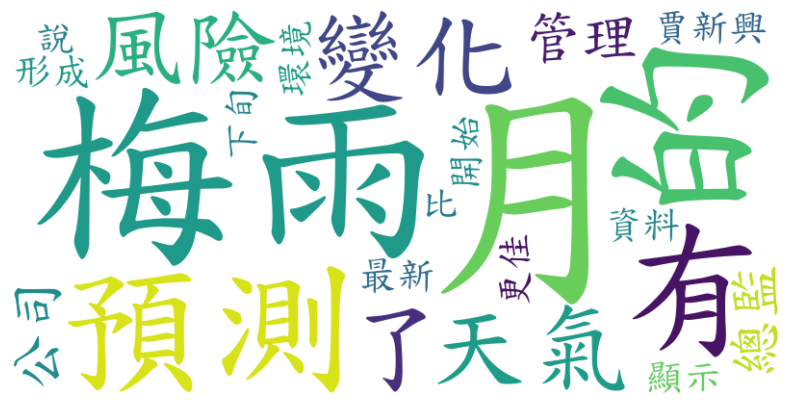

In [3]:
# write by Chatgpt
#Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

# 段文字
text = "梅雨的預測有變化了。天氣風險管理公司總監賈新興說，最新資料顯示，5月2月開始形成梅雨的環境比5月下旬更佳，"

# 使用 jieba 進行斷詞
words = jieba.lcut(text)
# 斷詞後重新組合為字符串，空格分隔
words_string = ' '.join(words)

# 使用適合顯示中文的字體
font_path = 'C:/Windows/Fonts/kaiu.ttf'

# 生成字雲
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(words_string)

# 顯示字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Please enter a data file path:news.txt
文化,0.25715819859779254
刘云山,0.22882627174601067
工作者,0.12784786745170215
看望,0.10534297722167553
陈先达,0.09538378326781916
习近平,0.07908266174529255
著名,0.0765850613101064
加强,0.0712553414918883
玛拉沁夫,0.06656586856861701
总书记,0.06496097775079787
简书,0.06358918884521277
文艺,0.06273516009614362
中国作协,0.06169198169680851
中国文联,0.05856545688351064
致以,0.057035233093617015
芭蕾舞,0.05567388535904255
中宣部,0.05518253791170213
家中,0.05518054254143617
繁荣,0.05469335964175531
知名人士,0.05405855337074469
委员,0.05359760066672872
老一辈,0.053238602946276595
文化界,0.05302580861303192
扎根,0.051417931635
弘扬,0.049034821408776595
重视,0.04856072886837766
发展,0.04754075200053192
艺术,0.04687367798792553
作者,0.046842439879228724
书法家,0.04655948497425532


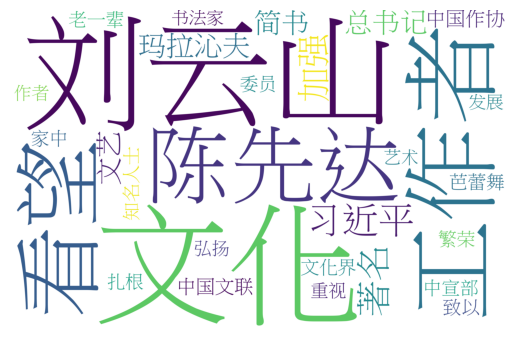

文化,1.0
发展,0.3018545044737876
加强,0.28173105224851525
看望,0.2774964516947975
工作者,0.27713934756891323
进行,0.2255333699665722
建设,0.2118461260696959
作者,0.20229549637765945
艺术,0.182472764709894
重视,0.16985950202287417
老一辈,0.1682706747225332
文艺,0.16741607270065
建议,0.15576549307534662
生活,0.15532509447336085
希望,0.15449719634114611
简书,0.15282185799338405
中国,0.15003689632469794
总书记,0.14729910530252815
作出,0.14439911761171495
哲学,0.1388994106886223
学习,0.13836830262243863
工作,0.13756548137885524
扶持,0.13712159123854917
国家,0.1335829310031728
贡献,0.12373109965542332
情况,0.12363061430589338
芭蕾舞,0.1230956788271705
有关,0.12228382046791675
提高,0.11772554283315788
扎根,0.11694450234857083


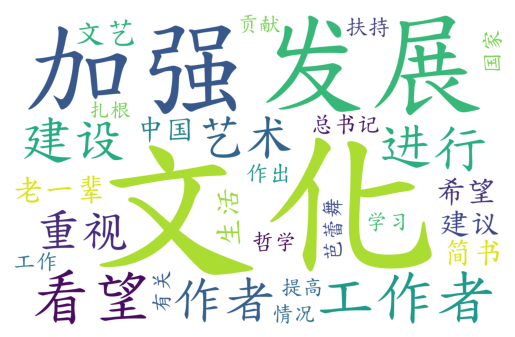

In [14]:
import os
import jieba
import jieba.analyse
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, ImageColorGenerator


def load_data(file_path):
    '''
    输入文件路径，返回文件内容
    '''
    content=""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
    except Exception as e:
        print("something wrong in load_data()")
    return content


def load_image(file_path):
    image = Image.open(file_path)
    graph = np.array(image)
    return graph


def generate_wordcloud2(content, graph):
    result = jieba.analyse.textrank(content, , withWeight=True)
    keywords = dict()
    for i in result:
        keywords[i[0]] = random.randint(1, 10)
    wc = WordCloud(font_path='C:/Windows/Fonts/kaiu.ttf',background_color='White', max_words=50, mask=graph)
   

    wc.generate_from_frequencies(keywords)
    # create coloring from image
    image_color = ImageColorGenerator(graph)
    plt.imshow(wc)
    plt.imshow(wc.recolor(color_func=image_color))
    plt.axis("off")
    plt.show()
    wc.to_file('test1.png')
    
def generate_wordcloud(content):
    result = jieba.analyse.textrank(content, topK=30, withWeight=True)
    # dict 字典是另一种可变容器模型，且可存储任意类型对象。
    keywords = dict()
    keys=""
    for i in result:
        keywords[i[0]] =i[1]  #random.randint(1, 10)
        print(i[0]+","+str(i[1]))
        keys=keys+i[0]+" "
        
    wc = WordCloud(font_path='C:/Windows/Fonts/kaiu.ttf',background_color='white',width=2000, height=1280,margin=20, max_words=50)

    wc.generate_from_frequencies(keywords)
    #wc.generate(keys)
    plt.imshow(wc)
  
    plt.axis("off")
    plt.show()
    wc.to_file('test2.png')

def generate_wordcloudtf(content):
    result = jieba.analyse.extract_tags(content, topK=30, withWeight=True)
    # dict 字典是另一种可变容器模型，且可存储任意类型对象。
    keywords = dict()
    keys=""
    for i in result:
        keywords[i[0]] = i[1]  #random.randint(1, 10)
        print(i[0]+","+str(i[1]))
        keys=keys+i[0]+" "
        
    wc = WordCloud(font_path='C:/Windows/Fonts/mingliu.ttc',background_color='white',width=1500, height=960, scale=2, max_words = 100, max_font_size=400)

    wc.generate_from_frequencies(keywords)
    #wc.generate(keys)
    plt.imshow(wc)
  
    plt.axis("off")
    plt.show()
    wc.to_file('test3.png')

if __name__ == '__main__':
    data_file = input('Please enter a data file path:')
    content = load_data(data_file)
    #image_file = input('Please enter a image file path:')
    #graph = load_image(image_file)
    #generate_wordcloud2(content, graph)
    generate_wordcloudtf(content)
    generate_wordcloud(content)

## D.提取关键词和摘要==>使用TextRank4ZH 套件(NLP應用三)
### TextRank算法可以用来从文本中提取关键词和摘要（重要的句子）。TextRank4ZH是针对中文文本的TextRank算法的python 提取关键词和摘要算法实现。
## Installation
## ==>pip install textrank4zh

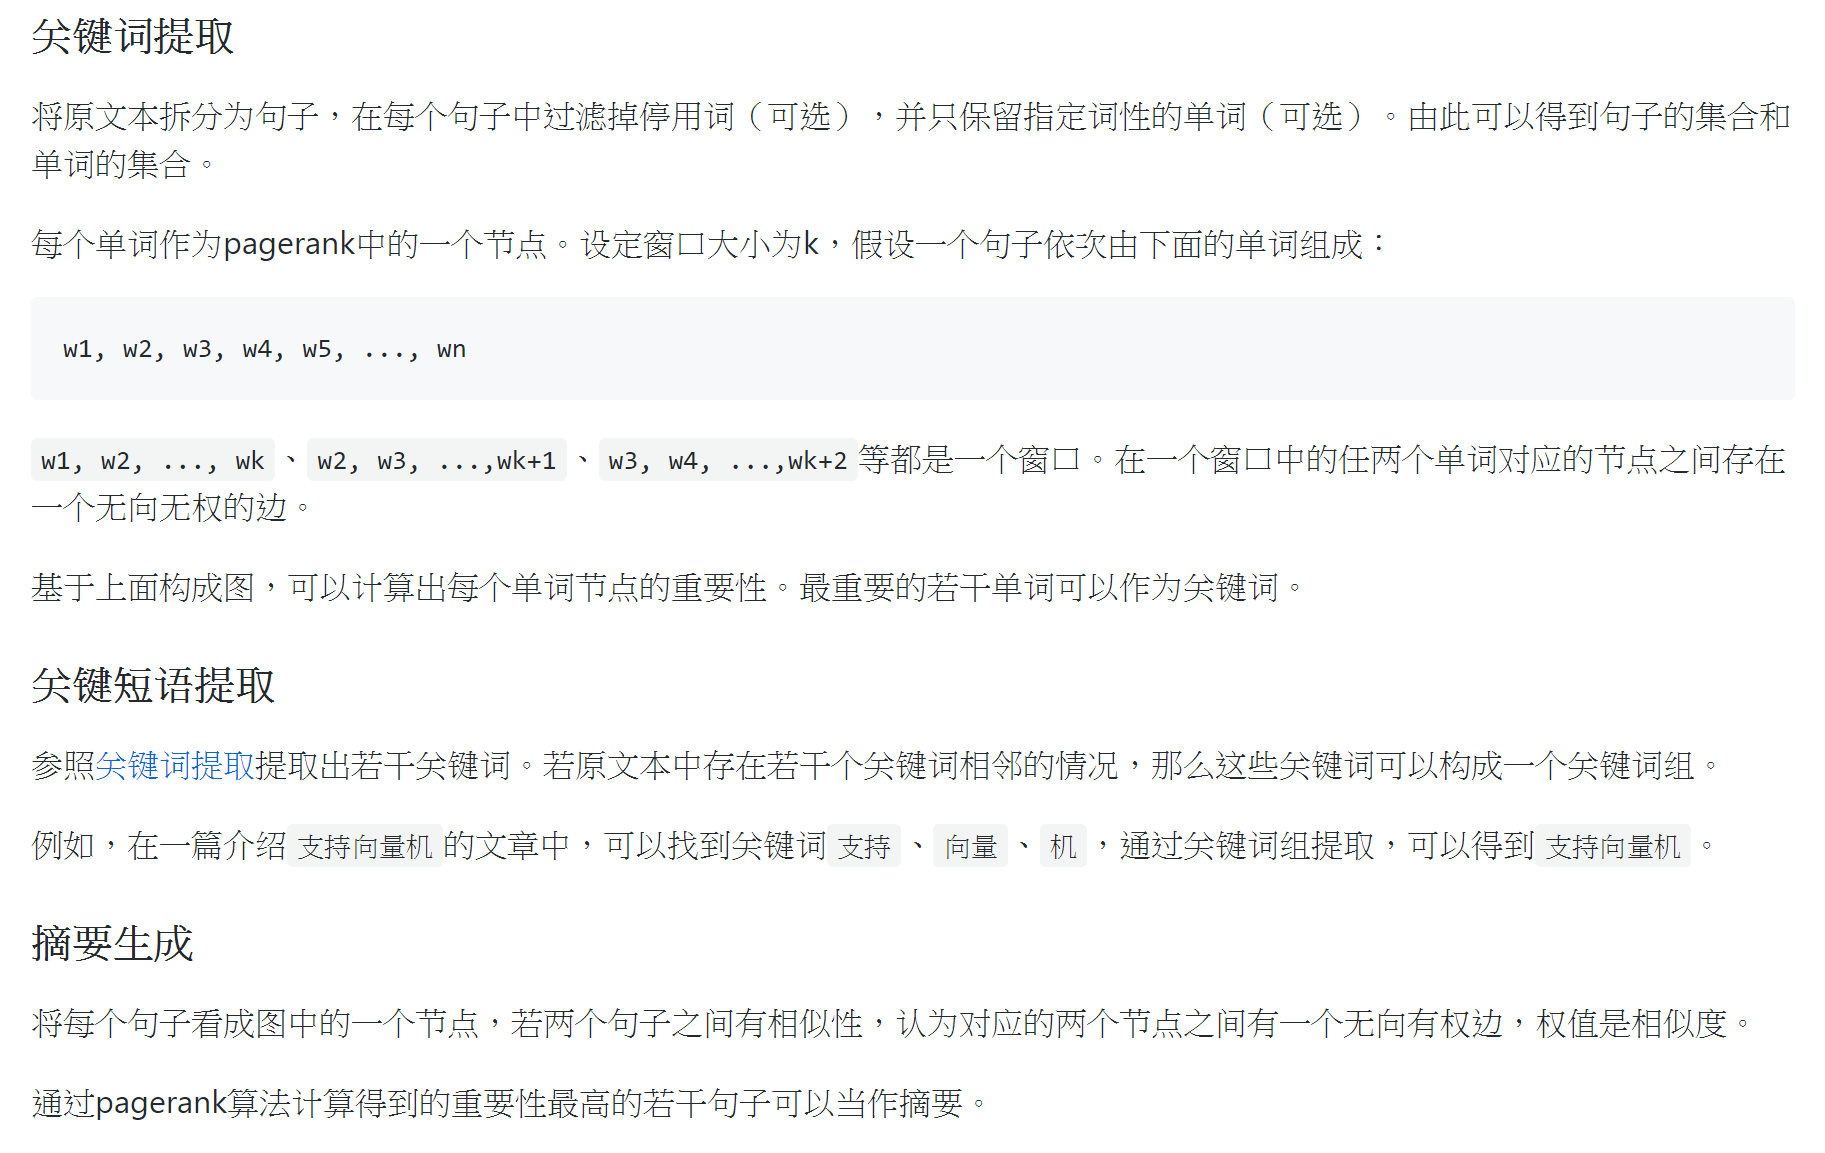

In [16]:
#-*- encoding:utf-8 -*-
from __future__ import print_function

import sys
try:
    reload(sys)
    sys.setdefaultencoding('utf-8')
except:
    pass

import codecs
from textrank4zh import TextRank4Keyword, TextRank4Sentence
file_name = "new2.txt"
text = codecs.open(file_name, 'r', 'utf-8').read()
tr4w = TextRank4Keyword()

tr4w.analyze(text=text, lower=True, window=2)  # py2中text必须是utf8编码的str或者unicode对象，py3中必须是utf8编码的bytes或者str对象

print( '关键词：' )
for item in tr4w.get_keywords(20, word_min_len=1):
    print(item.word, item.weight)

print()
print( '关键短语：' )
for phrase in tr4w.get_keyphrases(keywords_num=20, min_occur_num= 2):
    print(phrase)

tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')

print()
print( '摘要：' )
for item in tr4s.get_key_sentences(num=3):
    print(item.index, item.weight, item.sentence)  # index是语句在文本中位置，weight是权重

关键词：
天氣 0.031237833633337368
下旬 0.019533177090212895
高溫 0.016911980818125803
預報 0.016793292293798952
太平洋 0.016751061504749046
梅雨 0.016394830027247773
臉書 0.016304864426272832
指出 0.016290109424591262
預測 0.01625069746615096
後 0.015614321352208624
賈新興 0.015196198887508448
西南 0.014910465137350044
晴 0.014910465137350044
降雨 0.014910465137350044
氣象 0.014889992529911394
地區 0.013292712292535373
環境 0.013120963671454338
來 0.012209952372127734
菲律賓 0.012044731837275773
東 0.012044731837275773

关键短语：
下旬來

摘要：
1 0.0904127639817095 」天氣風險管理公司總監賈新興說，最新資料顯示，5月2月開始形成梅雨的環境比5月下旬更佳，天氣風險公司總經理彭啟明也在臉書發文說，下周有機會來一波梅雨
10 0.08168412759966262 氣象局提醒，入夜後鋒面接近，北部及東北部深夜開始有些短暫陣雨，其他地區的天氣要到明天才會有顯著的轉變，屆時請大家留意天氣變化
2 0.07361606573979038 賈新興在臉書發文指出，過去幾次的預報顯示，5月上旬的環境不像下旬來得好，但是最新的預報有了很大的變化


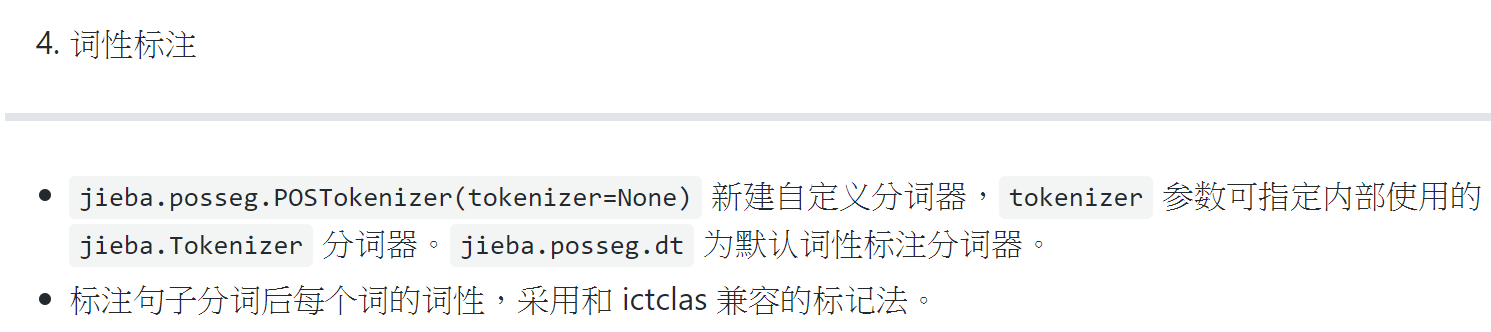

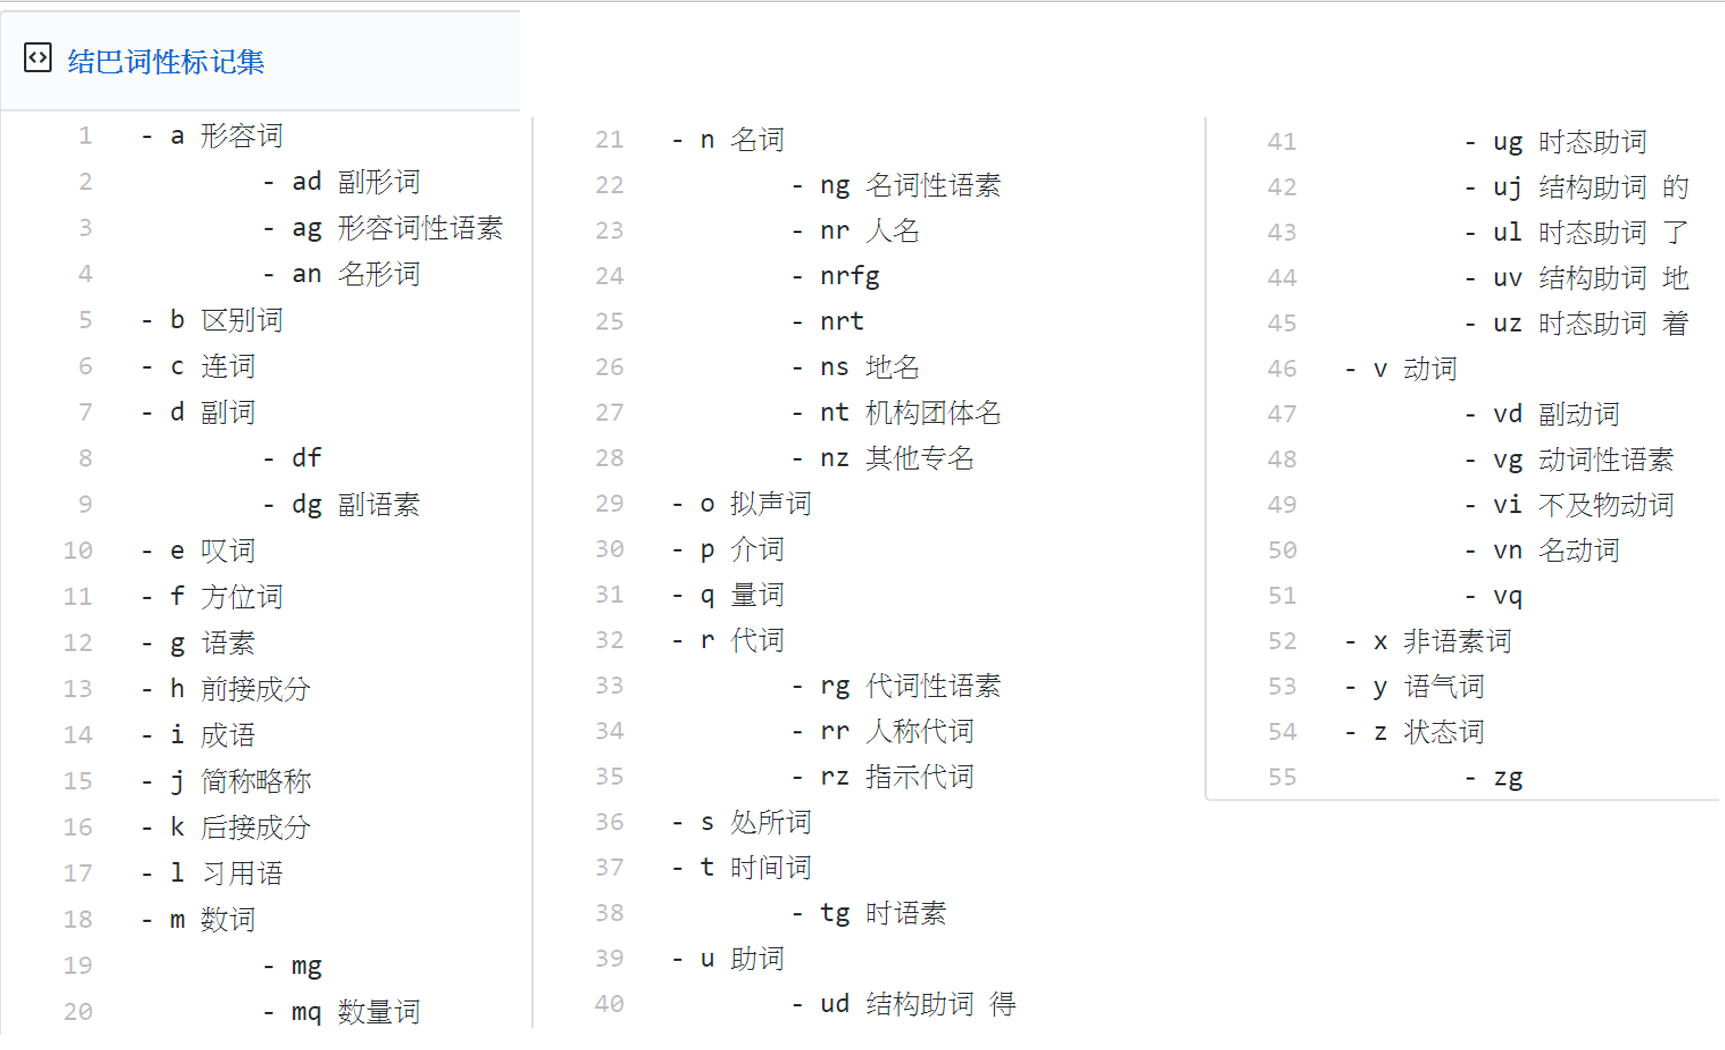

In [17]:
import jieba.posseg as pseg
words = pseg.cut("我爱北京天安门")
for word, flag in words:
    print('%s %s' % (word, flag))

我 r
爱 v
北京 ns
天安门 ns
